# Bitcoin Time Series Prediction with LSTM

In [76]:
!sudo pip3 install keras

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [77]:
!sudo pip3 install pandas

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [78]:
!sudo pip3 install plotly

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [79]:
!sudo pip3 install seaborn

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [80]:
!sudo pip3 install numpy

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [81]:
!sudo pip3 install sklearn

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [82]:
!sudo pip3 install tensorflow

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [83]:
!sudo pip3 install quandl

'sudo' is not recognized as an internal or external command,
operable program or batch file.


#### Import necessary library needed for the model training

In [103]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
import numpy as np
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline

#### Use Quandl api to get BTC/USD data from kraken exchange

In [104]:
#import quandl
#data = quandl.get('BCHARTS/KRAKENUSD', returns='pandas')

#### Read data set

In [110]:
data1 = pd.read_csv(filepath_or_buffer="bitcoinprices.txt",names=['stamp', 'price'])
print(data1)
data2 = pd.read_csv(filepath_or_buffer="sentiment6.txt",names=['stamp', 'sentiment'])
# print(data2)


        stamp    price
0    20180303  11366.2
1    20180302  11295.0
2    20180301  11079.9
3    20180228  10517.8
4    20180227  10747.0
5    20180226  10299.2
6    20180225   9498.3
7    20180224   9721.0
8    20180223  10109.8
9    20180222   9847.6
10   20180221  10595.5
11   20180220  11109.2
12   20180219  11575.0
13   20180218  10471.1
14   20180217  10626.2
15   20180216  10710.0
16   20180215   9826.5
17   20180214   9313.0
18   20180213   8830.0
19   20180212   8677.0
20   20180211   8457.0
21   20180210   7924.0
22   20180209   8972.6
23   20180208   8015.0
24   20180207   8274.9
25   20180206   7694.0
26   20180205   5971.4
27   20180204   8243.0
28   20180203   9155.0
29   20180202   8630.1
..        ...      ...
453  20161205    755.7
454  20161204    757.6
455  20161203    765.7
456  20161202    759.6
457  20161201    767.2
458  20161130    747.1
459  20161129    734.5
460  20161128    730.9
461  20161127    731.9
462  20161126    733.9
463  20161125    737.3
464  201611

#### View data info

In [111]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 2 columns):
stamp    483 non-null int64
price    483 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.6 KB


In [112]:
data2.info()
data2.dropna(axis=1,how='all') #Drop the columns where all elements are nan:
# data2['sentiment'] = [float(x) for x in data.sentiment.values]
for x in data2.sentiment:
    dList = float(x)
    type(dList)
    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
stamp        60 non-null int64
sentiment    60 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


#### View data rows

In [113]:
data1.head()

,stamp,price
0,20180303,11366.2
1,20180302,11295.0
2,20180301,11079.9
3,20180228,10517.8
4,20180227,10747.0


In [114]:
data2.head()

,stamp,sentiment
0,20180303,0.276879
1,20180302,0.276879
2,20180301,0.276879
3,20180228,0.187641
4,20180227,0.251219


#### Join on data frame

In [115]:
data = pd.merge(data1,data2, on='stamp', how='inner')

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 3 columns):
stamp        60 non-null int64
price        60 non-null float64
sentiment    60 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.9 KB


In [117]:
data.describe()
data

,stamp,price,sentiment
0,20180303,11366.2,0.276879
1,20180302,11295.0,0.276879
2,20180301,11079.9,0.276879
3,20180228,10517.8,0.187641
4,20180227,10747.0,0.251219
5,20180226,10299.2,0.204704
6,20180225,9498.3,0.144521
7,20180224,9721.0,0.112681
8,20180223,10109.8,0.340230
9,20180222,9847.6,0.350790


In [118]:
data['stamp'] = pd.to_datetime(data['stamp'].apply(str),format='%Y%m%d')
#data = data.sort_values(by='stamp')
data.tail()

,stamp,price,sentiment
55,2018-01-07,15927.9,0.108521
56,2018-01-06,16702.4,0.382211
57,2018-01-05,16528.6,0.168115
58,2018-01-04,14930.0,0.402441
59,2018-01-03,15050.0,0.121079


#### Plot line graph base on `Weighted Price`

In [119]:
btc_trace = go.Scatter(x=data['stamp'], y=data['price'], name= 'Price')
py.iplot([btc_trace])

#### Fill value 0 data points on `Weighted Price` with NAN and then use ffill method to fill values

In [120]:
data['price'].replace(0, np.nan, inplace=True)
data['price'].fillna(method='ffill', inplace=True)

#### Plot new line graph again on `Weighted Price` with newly filled values

In [121]:
btc_trace = go.Scatter(x=data['stamp'], y=data['price'], name= 'Price')
py.iplot([btc_trace])

### Using `Weighted Price` as a feature to train the LSTM model 

#### Use MinMaxScaler to normalize `Weighted Price` to range from 0 to 1

In [122]:
from sklearn.preprocessing import MinMaxScaler
values = data['price'].values.reshape(-1,1)
sentiment = data['sentiment'].values.reshape(-1,1)
values = values.astype('float32')
sentiment = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

#### Split 70% of data for training and 30% for testing

In [123]:
train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

42 18


#### Create function for creating dataset with look back

In [124]:
def create_dataset(dataset, look_back, sentiment):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        np.append(a,sentiment[i])
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

#### Generate dataset for trainX, trainY, testX, testY

In [125]:
look_back = 1
trainX, trainY = create_dataset(train, look_back, sentiment[0:train_size])
testX, testY = create_dataset(test, look_back, sentiment[train_size:len(scaled)])

41
17


In [126]:
test

array([[0.55154234],
       [0.61304635],
       [0.50572175],
       [0.45555872],
       [0.48910636],
       [0.64230734],
       [0.71584195],
       [0.7265493 ],
       [0.78246206],
       [0.7224677 ],
       [0.71421117],
       [0.7639176 ],
       [0.85868984],
       [0.927826  ],
       [1.        ],
       [0.9838039 ],
       [0.8348337 ],
       [0.8460162 ]], dtype=float32)

#### Reshape X for model training

In [127]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#### Running the LSTM model with 300 epochs

In [128]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=0, shuffle=False)

#### Plot line graph to show amount loss according the the epoch

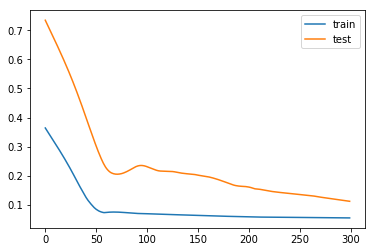

In [129]:
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

#### Make prediction using textX and plotting line graph against testY

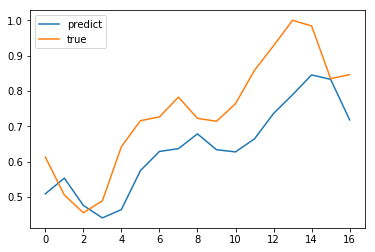

In [130]:
yhat = model.predict(testX)
pyplot.plot(yhat, label='predict')
pyplot.plot(testY, label='true')
pyplot.legend()
pyplot.show()

#### Scaler Inverse Y back to normal value

In [131]:
yhat_inverse = scaler.inverse_transform(yhat.reshape(-1, 1))
testY_inverse = scaler.inverse_transform(testY.reshape(-1, 1))

#### RMSE

In [132]:
rmse = sqrt(mean_squared_error(testY_inverse, yhat_inverse))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1375.846


#### Plot line graph with Y as USD

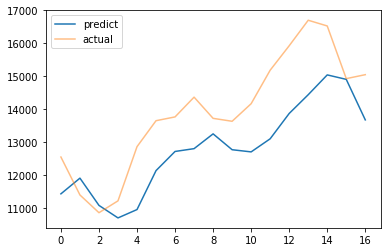

In [133]:
pyplot.plot(yhat_inverse, label='predict')
pyplot.plot(testY_inverse, label='actual', alpha=0.5)
pyplot.legend()
pyplot.show()

#### Convert X to dates

In [134]:
predictDates = data.tail(len(testX)).stamp

#### Reshape testY and yhat for plotly

In [135]:
testY_reshape = testY_inverse.reshape(len(testY_inverse))
yhat_reshape = yhat_inverse.reshape(len(yhat_inverse))

#### Plot predicted and actual line graph with X=dates, Y=USD

In [136]:
actual_chart = go.Scatter(x=predictDates, y=testY_reshape, name= 'Actual Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, actual_chart])

### Using additional features for model training

#### Find corrleration in features to `Weighted Price`

,price,sentiment
price,1.000000,0.015869
sentiment,0.015869,1.000000


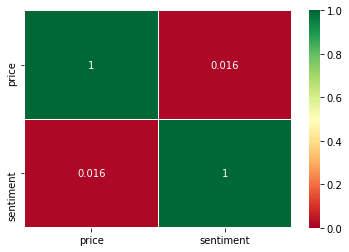

In [137]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.1, vmin=0)
data.corr()

Observation: `Volume` is corrlerated to `Weighted Price`. 
`Open`, `High`, `Low`, `Close` are directly related to `Weighted Price`

#### Function to convert series to supervised learning

In [138]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

#### Get all data values

In [139]:
values = data[['price']].values
values = values.astype('float32')

#### Normalize features to range from 0 to 1

In [140]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

#### Frame as supervised learning

In [141]:
reframed = series_to_supervised(scaled, 1, 1)
reframed.head()

,var1(t-1),var1(t)
1,0.502730,0.496095
2,0.496095,0.476051
3,0.476051,0.423670
4,0.423670,0.445028
5,0.445028,0.403299


#### Drop unncessary columns 

In [ ]:
#reframed.drop(reframed.columns[[1,3]], axis=1, inplace=True)
#print(reframed.head())

#### Split data to 70% training, 30% testing

In [142]:
values = reframed.values
n_train_hours = int(len(values) * 0.7)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(41, 1, 1) (41,) (18, 1, 1) (18,)


#### Training the LSTM model with 300 epochs

In [143]:
multi_model = Sequential()
multi_model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
multi_model.add(Dense(1))
multi_model.compile(loss='mae', optimizer='adam')
multi_history = multi_model.fit(train_X, train_y, epochs=300, batch_size=100, validation_data=(test_X, test_y), verbose=0, shuffle=False)

#### Plot line graph to show amount loss according the the epoch

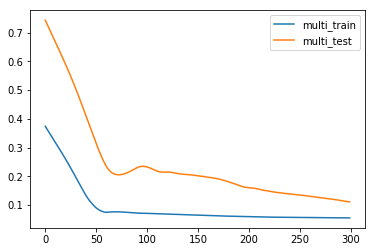

In [144]:
pyplot.plot(multi_history.history['loss'], label='multi_train')
pyplot.plot(multi_history.history['val_loss'], label='multi_test')
pyplot.legend()
pyplot.show()

#### Make prediction using textX and plotting line graph against testY

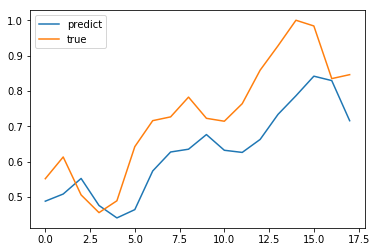

In [145]:
yhat = multi_model.predict(test_X)
pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

#### Scaler Inverse Y back to normal value

In [146]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

#### RMSE

In [147]:
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1363.326


#### Plot line graph with actual price, predicted price with feature `Weighted Price`, predicted price with features `Volume` and `Weighted Price`

In [148]:
actual_chart = go.Scatter(x=predictDates, y=inv_y, name= 'Actual Price')
multi_predict_chart = go.Scatter(x=predictDates, y=inv_yhat, name= 'Multi Predict Price')
predict_chart = go.Scatter(x=predictDates, y=yhat_reshape, name= 'Predict Price')
py.iplot([predict_chart, multi_predict_chart, actual_chart])

- LSTM with single feature of `Weighted Price` have RMSE of 159.194
- LSTM with features of `Volume(BTC)`, `Volume(Currency)` and `Weighted Price` have RMSE of 96.184
- LSTM with multi features shows more accurate results as show in line chart above